In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
The Interquartile Range (IQR) method is a common technique for detecting and removing outliers in a dataset. It is based on the spread of the middle 50% of the data. The IQR is the range between the first quartile (Q1) and the third quartile (Q3), and outliers are typically defined as points that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

### Steps for Outlier Removal Using the IQR Method

1. **Calculate the first quartile (Q1) and third quartile (Q3).**
2. **Compute the IQR (Q3 - Q1).**
3. **Determine the lower and upper bounds:**
   - Lower Bound = Q1 - 1.5 * IQR
   - Upper Bound = Q3 + 1.5 * IQR
4. **Identify and remove data points that fall outside these bounds.**

### Example

Let's go through an example using Python and pandas.

#### 1. Import Necessary Libraries

```python
import pandas as pd

# Sample data with potential outliers
data = {
    'Age': [25, 30, 35, 40, 35, 30, 25, 120, 22, 23, 21, 25, 30],
    'Income': [50000, 60000, 65000, 70000, 75000, 60000, 55000, 300000, 52000, 54000, 53000, 58000, 60000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
```

#### 2. Calculate IQR and Remove Outliers

```python
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:")
print(Q1)
print("\nQ3:")
print(Q3)
print("\nIQR:")
print(IQR)

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:")
print(lower_bound)
print("\nUpper Bound:")
print(upper_bound)

# Remove outliers
df_no_outliers = df[~((df < (lower_bound)) | (df > (upper_bound))).any(axis=1)]

print("\nDataFrame after Removing Outliers using IQR method:")
print(df_no_outliers)
```

### Full Example Code

```python
import pandas as pd

# Sample data with potential outliers
data = {
    'Age': [25, 30, 35, 40, 35, 30, 25, 120, 22, 23, 21, 25, 30],
    'Income': [50000, 60000, 65000, 70000, 75000, 60000, 55000, 300000, 52000, 54000, 53000, 58000, 60000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("\nQ1:")
print(Q1)
print("\nQ3:")
print(Q3)
print("\nIQR:")
print(IQR)

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:")
print(lower_bound)
print("\nUpper Bound:")
print(upper_bound)

# Remove outliers
df_no_outliers = df[~((df < (lower_bound)) | (df > (upper_bound))).any(axis=1)]

print("\nDataFrame after Removing Outliers using IQR method:")
print(df_no_outliers)
```

### Explanation

- **Calculate Q1 and Q3:** The first and third quartiles are calculated using the `quantile` method.
- **Compute the IQR:** The IQR is the difference between Q3 and Q1.
- **Determine the bounds:** The lower and upper bounds for identifying outliers are calculated.
- **Remove outliers:** Data points that fall outside the bounds are removed from the dataframe.

### Output

```
Original DataFrame:
     Age  Income
0     25   50000
1     30   60000
2     35   65000
3     40   70000
4     35   75000
5     30   60000
6     25   55000
7    120  300000
8     22   52000
9     23   54000
10    21   53000
11    25   58000
12    30   60000

Q1:
Age          23.5
Income    54000.0
Name: 0.25, dtype: float64

Q3:
Age          35.0
Income    65000.0
Name: 0.75, dtype: float64

IQR:
Age          11.5
Income    11000.0
dtype: float64

Lower Bound:
Age          6.25
Income    37500.0
dtype: float64

Upper Bound:
Age           52.25
Income    81500.00
dtype: float64

DataFrame after Removing Outliers using IQR method:
    Age  Income
0    25   50000
1    30   60000
2    35   65000
3    40   70000
4    35   75000
5    30   60000
6    25   55000
8    22   52000
9    23   54000
10   21   53000
11   25   58000
12   30   60000
```

### Summary

Using the IQR method is a robust way to detect and remove outliers. It is less sensitive to extreme values compared to methods based on mean and standard deviation. This method ensures that the majority of your data is within a reasonable range, reducing the impact of outliers on your analysis.

In [2]:
df = pd.read_csv('placement.csv')


In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<ipython-input-4-de614b1f4e84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-4-de614b1f4e84>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


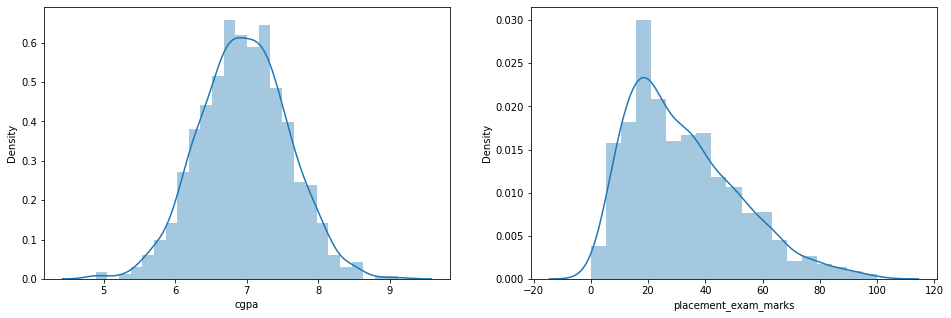

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot: ylabel='placement_exam_marks'>

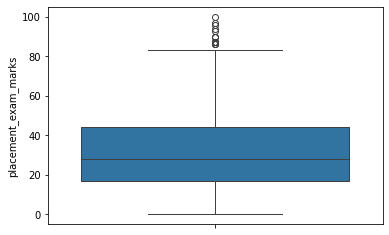

In [7]:
#iqr -boxploting
sns.boxplot(df['placement_exam_marks'])


In [8]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [9]:
percentile75


44.0

In [10]:
iqr = percentile75 - percentile25


In [11]:
iqr

27.0

In [12]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [13]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [15]:
#outliers 
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df['placement_exam_marks'] < lower_limit]


,cgpa,placement_exam_marks,placed


In [17]:
#trimming
new_df = df[df['placement_exam_marks'] < upper_limit ]

In [18]:
new_df.shape

(985, 3)

<ipython-input-19-d0a2ab2fcc4d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-19-d0a2ab2fcc4d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


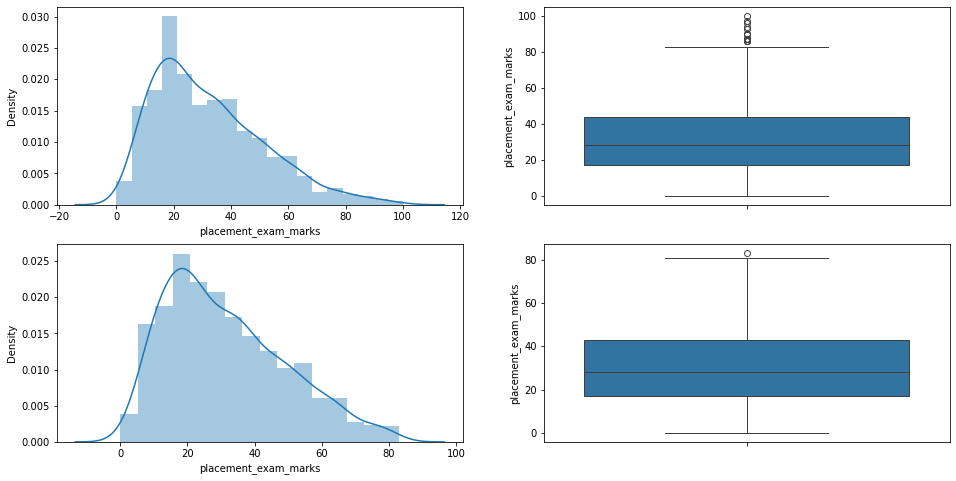

In [19]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [20]:
#capping
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [22]:
new_df_cap.shape

(1000, 3)

<ipython-input-23-4336df809185>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-23-4336df809185>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


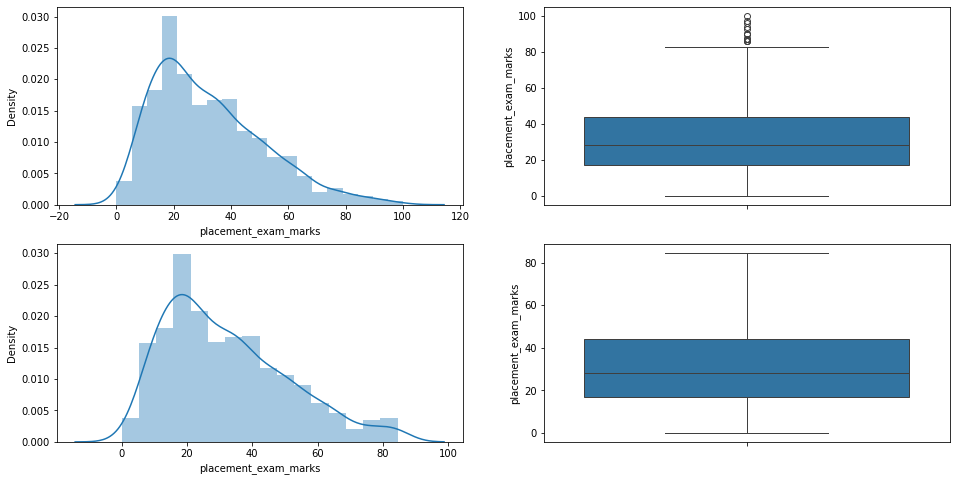

In [23]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()